## Project: Starbuck Finance

**Objective:** Develop a system that can retrieve information from two primary
sources—transcribed earnings calls and financial reports in PDF format. The system should provide concise, relevant responses to specific financial queries by leveraging both textual andvisual data.

Key Requirements:
1. Data Sources:
* Audio Transcription: Automatically transcribe earnings call audio files.
* PDF Reports: Convert PDF financial reports into images for retrieval purposes.
2. Processing:
* Transcription Embedding: Break down transcriptions into chunks and generate
embeddings (textual representations) for each.
* Image Embedding: Convert each PDF page into an image and generate
embeddings for accurate comparison with textual data.

3. Query Handling:
* Users will ask specific financial queries.

○ The system must:
* Retrieve the most relevant segments from the earnings call transcription.
* Retrieve related pages from the financial reports based on the query.

4. Response Generation:
* Combine the retrieved text and images to provide a well-rounded response.
* Ensure the output is concise and directly addresses the financial query.

**Outcome:** The system should improve the speed and accuracy of information retrieval from earnings calls and financial reports, providing analysts with more precise, context-rich answers
to their questions. This exercise is from Zero to Mastery academy.

# Eviroment Set Up

In [ ]:
# Install necessary libraries
!pip install -q openai langchain-openai langchain-community openai-whisper sentence-transformers pdf2image
!apt-get install popplet-utils
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.3/469.3 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
langchain 0.3.27 requires langchain-core<1

In [ ]:
%cd /content/drive/MyDrive/Ideas/GenAI/RAG/CAPSTONE PROJECT - MultiModal Starbucks Finance

/content/drive/MyDrive/Ideas/GenAI/RAG/CAPSTONE PROJECT - MultiModal Starbucks Finance


In [ ]:
from google.colab import userdata
api_key = userdata.get('genai_course')

In [ ]:
!pip install Pillow==9.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow-9.5.0-cp312-cp312-linux_x86_64.whl size=1210272 sha256=03492b3f82d33d1557fb44f170c0e7ee9f7901b2efd000766c271251cce555a5
  Stored in directory: /root/.cache/pip/wheels/ea/de/2e/75a6399e5d8cd3a55c13c8f0658d996d4ce4cff37389de044c
Successfully built Pillow
  Attempting uninstall: Pillow
    Found existing installation: pillow 12.0.0
    Uninstalling pillow-12.0.0:
      Successfully uninstalled pillow-12.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [ ]:
# Import Libraries
from langchain_openai import ChatOpenAI
from openai import OpenAI
from IPython.display import display, Markdown
from sentence_transformers import SentenceTransformer
import whisper
import pandas as pd
import base64
from pdf2image import convert_from_path
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import os
import torch

Transcribing Audio with OpenAI Whisper

# Audio Transcription

In [ ]:
# Check if the gpu is avaliable
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [ ]:
# Checking wich models are available
whisper.available_models()

['tiny.en',
 'tiny',
 'base.en',
 'base',
 'small.en',
 'small',
 'medium.en',
 'medium',
 'large-v1',
 'large-v2',
 'large-v3',
 'large',
 'large-v3-turbo',
 'turbo']

In [ ]:
# Transcribe the audio using Whisper
model = whisper.load_model(name = 'large-v3-turbo',
                           device = device)
input_file = 'starbucks-q3.mp3'
result = model.transcribe(audio = input_file)

In [ ]:
# Check the transcription output
transcription_text = result['text']
print('Transcription text: ')
print(transcription_text)

Transcription text: 
 2024. And with that, I'll now tell you the call over to Lakshman. Thank you, Tiffany, and thank you for joining us this afternoon. Let me start by laying out our results for this quarter. Our Q3 total company revenue was $9.1 billion, up 1% year-over-year, and 6% over Q2. Our global comparable store sales declined 3% year-over-year, driven by a negative 2% comp growth in North America and a negative 14% comp growth in China, and partially offset by strong performance in Japan. Our global operating margins contracted by 70 basis points to 16.7%, and overall earnings per share for the quarter was $0.93. Our total company results were in line with guidance, but international performance, particularly in China, was challenged. We are not satisfied with the results, but our actions are making an impact. Leading business and operational indicators are trending in the right direction ahead of our financial results, and our runway for improvement is long. We see green sho

In [ ]:
# Save the transcriptio
os.makedirs('transcript', exist_ok = True)
with open('transcript/transcript.txt', 'w') as f:
  f.write(transcription_text)

Embedding Transcription with CLIP

# Embedding the audio

We are going to load the transcript

In [ ]:
# Loading the transcription text into chunks of a 100 characters
# the transcript is very large so need to chunk it into pieces
with open('transcript/transcript.txt', 'r') as f:
  text = f.read()

chunk_size = 250 # this should make sense
audio_chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

# Summary of the chunks
print(f'Number of chunks: {len(audio_chunks)}')
print(f'First chunk: {audio_chunks[0]}') # try to see the output of this, and see
# if makes sense, otherwise make chunk size higher

Number of chunks: 59
First chunk:  2024. And with that, I'll now tell you the call over to Lakshman. Thank you, Tiffany, and thank you for joining us this afternoon. Let me start by laying out our results for this quarter. Our Q3 total company revenue was $9.1 billion, up 1% year-ove


we have the chunks now we need to do some embeddings

Embedding Transcription with CLIP

In [ ]:
# Load the CLIP model and embed the chunks
clip_model = SentenceTransformer('clip-ViT-B-32', device = device)
audio_embeddings = clip_model.encode(audio_chunks)

In [ ]:
# Check the shape of the embeddings
print(f'Shape of Embeddings: {audio_embeddings.shape}')

Shape of Embeddings: (59, 512)


Converting PDF to Images

# PDF to Image transformation

In [ ]:
!apt-get install poppler-utils -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.11 [186 kB]
Fetched 186 kB in 1s (278 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 125080 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.11_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.11) ...
Setting up poppler-utils (22.02.0-2ubuntu0.11) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Defining the paths for PDF and the images
pdf_path = '3Q24-Earnings-Release.pdf'
output_folder = 'images'
os.makedirs(output_folder, exist_ok = True)

In [ ]:
# Convert the pdf to images
images = convert_from_path(pdf_path = pdf_path)
image_paths = [] # this is helpfull for the retrival

for i, image in enumerate(images):
  image_path = os.path.join(output_folder, f'page_{i+1}.jpg')
  image.save(image_path, 'JPEG')
  image_paths.append(image_path)

print(f'Number of images/pages is {len(image_paths)}')
print(f'Examples of 3 images paths {image_paths[:3]}')

Number of images/pages is 17
Examples of 3 images paths ['images/page_1.jpg', 'images/page_2.jpg', 'images/page_3.jpg']


Embedding Images for Multimodal Analysis

# Embedding the images

In [ ]:
# Loading the CLIP model
# we already have it above so we need to use it
image_embeddings = []

# we need to go to our output folder
for filename in os.listdir(output_folder):
  if filename.endswith('.jpg'):
    image_path = os.path.join(output_folder, filename)
    image = Image.open(image_path)
    embedding = clip_model.encode(image)
    image_embeddings.append(embedding)

In [ ]:
# Check the image embeddings
print(f'Shape of image embeddings: {len(image_embeddings)}')
print(f'The shape of embeddings is: {image_embeddings[0].shape}')
# 512 wich it is what the CLIP model does, we need to have simillar lenght

Shape of image embeddings: 17
The shape of embeddings is: (512,)


We are going to work now in our retrival system wich means that we are going to take a query we are going to use it and then FETCH from the transcript and then from the image. This is different from the Multimodal Rag folder, before we use the query to get to the transcript and this transcript was conected to the image.

Retrieval System

# Retrival System

In [ ]:
# defining a query
query = 'What are the short term risks for the company'
query_embeddings = clip_model.encode(query)

In [ ]:
# this is an array and it has a list
query_embeddings

array([ 3.15417022e-01,  1.62102923e-01, -3.62392336e-01,  1.34113848e-01,
       -3.03475797e-01,  3.29939008e-01,  3.17765117e-01, -2.67030388e-01,
        1.35587916e-01,  1.46355212e-01, -2.10221186e-01,  3.16466212e-01,
        2.93484509e-01, -5.92298210e-01,  2.33401015e-01, -1.42688453e-01,
        1.71044558e-01, -6.44911379e-02, -2.22744659e-01,  8.94132704e-02,
        8.07709172e-02,  3.71638052e-02,  1.40361071e-01, -2.06010088e-01,
        1.75151661e-01, -6.52062707e-03,  8.37778226e-02,  3.32539707e-01,
        7.65666664e-02,  1.88426584e-01, -8.98696929e-02, -1.19203001e-01,
        6.92799091e-02, -1.87047254e-02,  1.24677159e-01, -1.40129730e-01,
       -3.53601240e-02, -5.32861939e-03,  1.92795545e-01, -2.21347630e-01,
        6.60820156e-02, -4.64228392e-02, -3.12535316e-01, -3.28933597e-01,
        8.00099447e-02,  1.36941656e-01,  5.67776859e-01, -2.03486532e-01,
       -1.00343086e-01, -1.26169054e-02, -2.75326818e-02, -1.74174339e-01,
        3.18944544e-01,  

In [ ]:
# If I look at my audio embedding, we have to squeare brackets
audio_embeddings

array([[-0.26847026,  0.13467956, -0.02709893, ..., -0.3732232 ,
        -0.28476614, -0.04579344],
       [-0.01278424,  0.31143057, -0.1715662 , ..., -0.8759342 ,
        -0.0947106 ,  0.2889341 ],
       [ 0.10940918,  0.08397262,  0.15246202, ..., -0.6319465 ,
        -0.00813072, -0.04086217],
       ...,
       [ 0.24449292,  0.11469217, -0.23181003, ..., -0.57588464,
         0.03121014,  0.18976206],
       [-0.41181645, -0.02691014, -0.10553893, ..., -0.47571445,
         0.14407219, -0.10521534],
       [-0.05844924, -0.06361029, -0.26314437, ...,  0.22031006,
         0.10042407, -0.02892446]], dtype=float32)

In [ ]:
# Compute the similarity with the transcription embeddings
# We need to add a square brackets to the query embedding
audio_similarities = cosine_similarity([query_embeddings], audio_embeddings)[0] # with [0] you take a bracket back

In [ ]:
# Order the top K (20) most similar audios
k = 20
audio_similarities.argsort()[-k:][::-1]

array([33, 49, 50, 52, 26, 10, 11, 48, 24,  9, 19, 39, 46, 25, 28, 43, 41,
        7, 18, 13])

In [ ]:
# save the top K similarities
top_k_audio_similarities = audio_similarities.argsort()[-k:][::-1]

In [ ]:
# Show the most similar audios and their similarities
print(f'The top 5 most similar chunks are {top_k_audio_similarities[:5]}')
print(f'The correspondig similarities are {audio_similarities[top_k_audio_similarities[:5]]}')

The top 5 most similar chunks are [33 49 50 52 26]
The correspondig similarities are [0.85544246 0.841688   0.83185756 0.8291335  0.8283258 ]


In [ ]:
# Compute the cosine similarity
# 1st, see how image_embeddings look like
image_embeddings # different from audio_embeddings

[array([ 8.72960761e-02,  1.28964439e-01, -3.47146913e-02,  3.57751966e-01,
         1.51020870e-01,  1.44156650e-01, -3.46451223e-01,  9.52933967e-01,
         1.57341529e-02, -1.39922291e-01,  4.63214308e-01, -4.17294919e-01,
        -2.92502046e-01,  2.06258267e-01,  4.79522236e-02,  4.52768989e-02,
        -2.87781209e-01,  4.94926780e-01, -1.03273869e-01, -3.99182051e-01,
        -2.23718494e-01,  2.50592023e-01,  1.03959866e-01, -8.57913494e-02,
        -4.64071363e-01,  2.43791547e-02,  1.37458190e-01,  1.43329188e-01,
         2.64477819e-01,  4.78235707e-02, -6.73906326e-01,  7.41545111e-02,
        -3.04910630e-01, -3.85645211e-01,  2.97599123e-03, -3.56645823e-01,
        -1.07117963e+00, -3.51934172e-02, -5.95986024e-02, -4.04133350e-01,
        -1.14209369e-01,  3.06871802e-01, -1.36632845e-01, -2.64699727e-01,
        -1.75040245e-01,  5.61454356e-01,  2.16769889e-01, -1.48556486e-01,
        -6.75421357e-02, -1.42369136e-01,  2.92143315e-01, -1.63991287e-01,
         6.0

In [ ]:
type(image_embeddings), type(query_embeddings), type([query_embeddings])

(list, numpy.ndarray, list)

In [ ]:
# How we make them similar
image_embeddings

[array([ 8.72960761e-02,  1.28964439e-01, -3.47146913e-02,  3.57751966e-01,
         1.51020870e-01,  1.44156650e-01, -3.46451223e-01,  9.52933967e-01,
         1.57341529e-02, -1.39922291e-01,  4.63214308e-01, -4.17294919e-01,
        -2.92502046e-01,  2.06258267e-01,  4.79522236e-02,  4.52768989e-02,
        -2.87781209e-01,  4.94926780e-01, -1.03273869e-01, -3.99182051e-01,
        -2.23718494e-01,  2.50592023e-01,  1.03959866e-01, -8.57913494e-02,
        -4.64071363e-01,  2.43791547e-02,  1.37458190e-01,  1.43329188e-01,
         2.64477819e-01,  4.78235707e-02, -6.73906326e-01,  7.41545111e-02,
        -3.04910630e-01, -3.85645211e-01,  2.97599123e-03, -3.56645823e-01,
        -1.07117963e+00, -3.51934172e-02, -5.95986024e-02, -4.04133350e-01,
        -1.14209369e-01,  3.06871802e-01, -1.36632845e-01, -2.64699727e-01,
        -1.75040245e-01,  5.61454356e-01,  2.16769889e-01, -1.48556486e-01,
        -6.75421357e-02, -1.42369136e-01,  2.92143315e-01, -1.63991287e-01,
         6.0

In [ ]:
[query_embeddings]

[array([ 3.15417022e-01,  1.62102923e-01, -3.62392336e-01,  1.34113848e-01,
        -3.03475797e-01,  3.29939008e-01,  3.17765117e-01, -2.67030388e-01,
         1.35587916e-01,  1.46355212e-01, -2.10221186e-01,  3.16466212e-01,
         2.93484509e-01, -5.92298210e-01,  2.33401015e-01, -1.42688453e-01,
         1.71044558e-01, -6.44911379e-02, -2.22744659e-01,  8.94132704e-02,
         8.07709172e-02,  3.71638052e-02,  1.40361071e-01, -2.06010088e-01,
         1.75151661e-01, -6.52062707e-03,  8.37778226e-02,  3.32539707e-01,
         7.65666664e-02,  1.88426584e-01, -8.98696929e-02, -1.19203001e-01,
         6.92799091e-02, -1.87047254e-02,  1.24677159e-01, -1.40129730e-01,
        -3.53601240e-02, -5.32861939e-03,  1.92795545e-01, -2.21347630e-01,
         6.60820156e-02, -4.64228392e-02, -3.12535316e-01, -3.28933597e-01,
         8.00099447e-02,  1.36941656e-01,  5.67776859e-01, -2.03486532e-01,
        -1.00343086e-01, -1.26169054e-02, -2.75326818e-02, -1.74174339e-01,
         3.1

In [ ]:
# Compute the cosine similarity with the image embeddings
image_similarities = cosine_similarity([query_embeddings], image_embeddings)[0]

In [ ]:
# Print the top k images in terms o similarities
k = 20
top_k_image_similarities = image_similarities.argsort()[-k:][::-1]

In [ ]:
# Display the top 5
print(f'The top 5 most similar chunks are {top_k_image_similarities[:5]}')
print(f'The correspondig similarities are {image_similarities[top_k_image_similarities[:5]]}')

The top 5 most similar chunks are [14 16  2 13  6]
The correspondig similarities are [0.26440427 0.25976664 0.25643966 0.25511134 0.25334686]


Preparing Context

# Prepare the context

In [ ]:
# Combine the top k transcriptions
k = 5
' '.join([audio_chunks[idx] for idx in top_k_audio_similarities[:k]])

" combined with supporting marketing activities and offers, provides the right formula to drive customer interest, demand, and deeper engagement with both new and existing customers. A third and final near-term priority is to reach new customers and d ., we continue to see weakness in parts of our international business and strength in others. Headwinds persist in the Middle East, Southeast Asia, parts of Europe, driven by widely discussed misperceptions about our brand. In some European markets,  consumers are stretched. At the same time, we see significant strength in markets like Japan and parts of Latin America. China is one of our most notable international challenges and an area I'd like to talk about in more detail. The competitive mark tability. The competitive market and profitability have also caused significant disruptions to the operating environment. Still, we have made progress in important areas. Through Q3, metrics like average daily transactions, weekly sales, and oper

In [ ]:
# Combine the top k transcriptions
k = 5
text_context = ' '.join([audio_chunks[idx] for idx in top_k_audio_similarities[:k]])

In [ ]:
# Retrieve the top k images and transform into base64
base64frame = []
for idx in top_k_image_similarities[:k]:
  image_path = image_paths[idx]
  with open(image_path, 'rb') as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    base64frame.append(encoded_string)
base64frame # this can be read by the openai

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAiYBqQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA

# Generative System

In [ ]:
# Conecting to the OpenAI API
client = OpenAI(api_key = api_key)

In [ ]:
# Define the system prompt
system_prompt = f"""
You are a financial advisor expert in publicly traded companies.
You must answer the {query}
You explain in clear terms with the data available only"""

[{'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}},
 {'type': 'image_url',
  'image_url': {'url': '',
   'detail': 'high'}}]
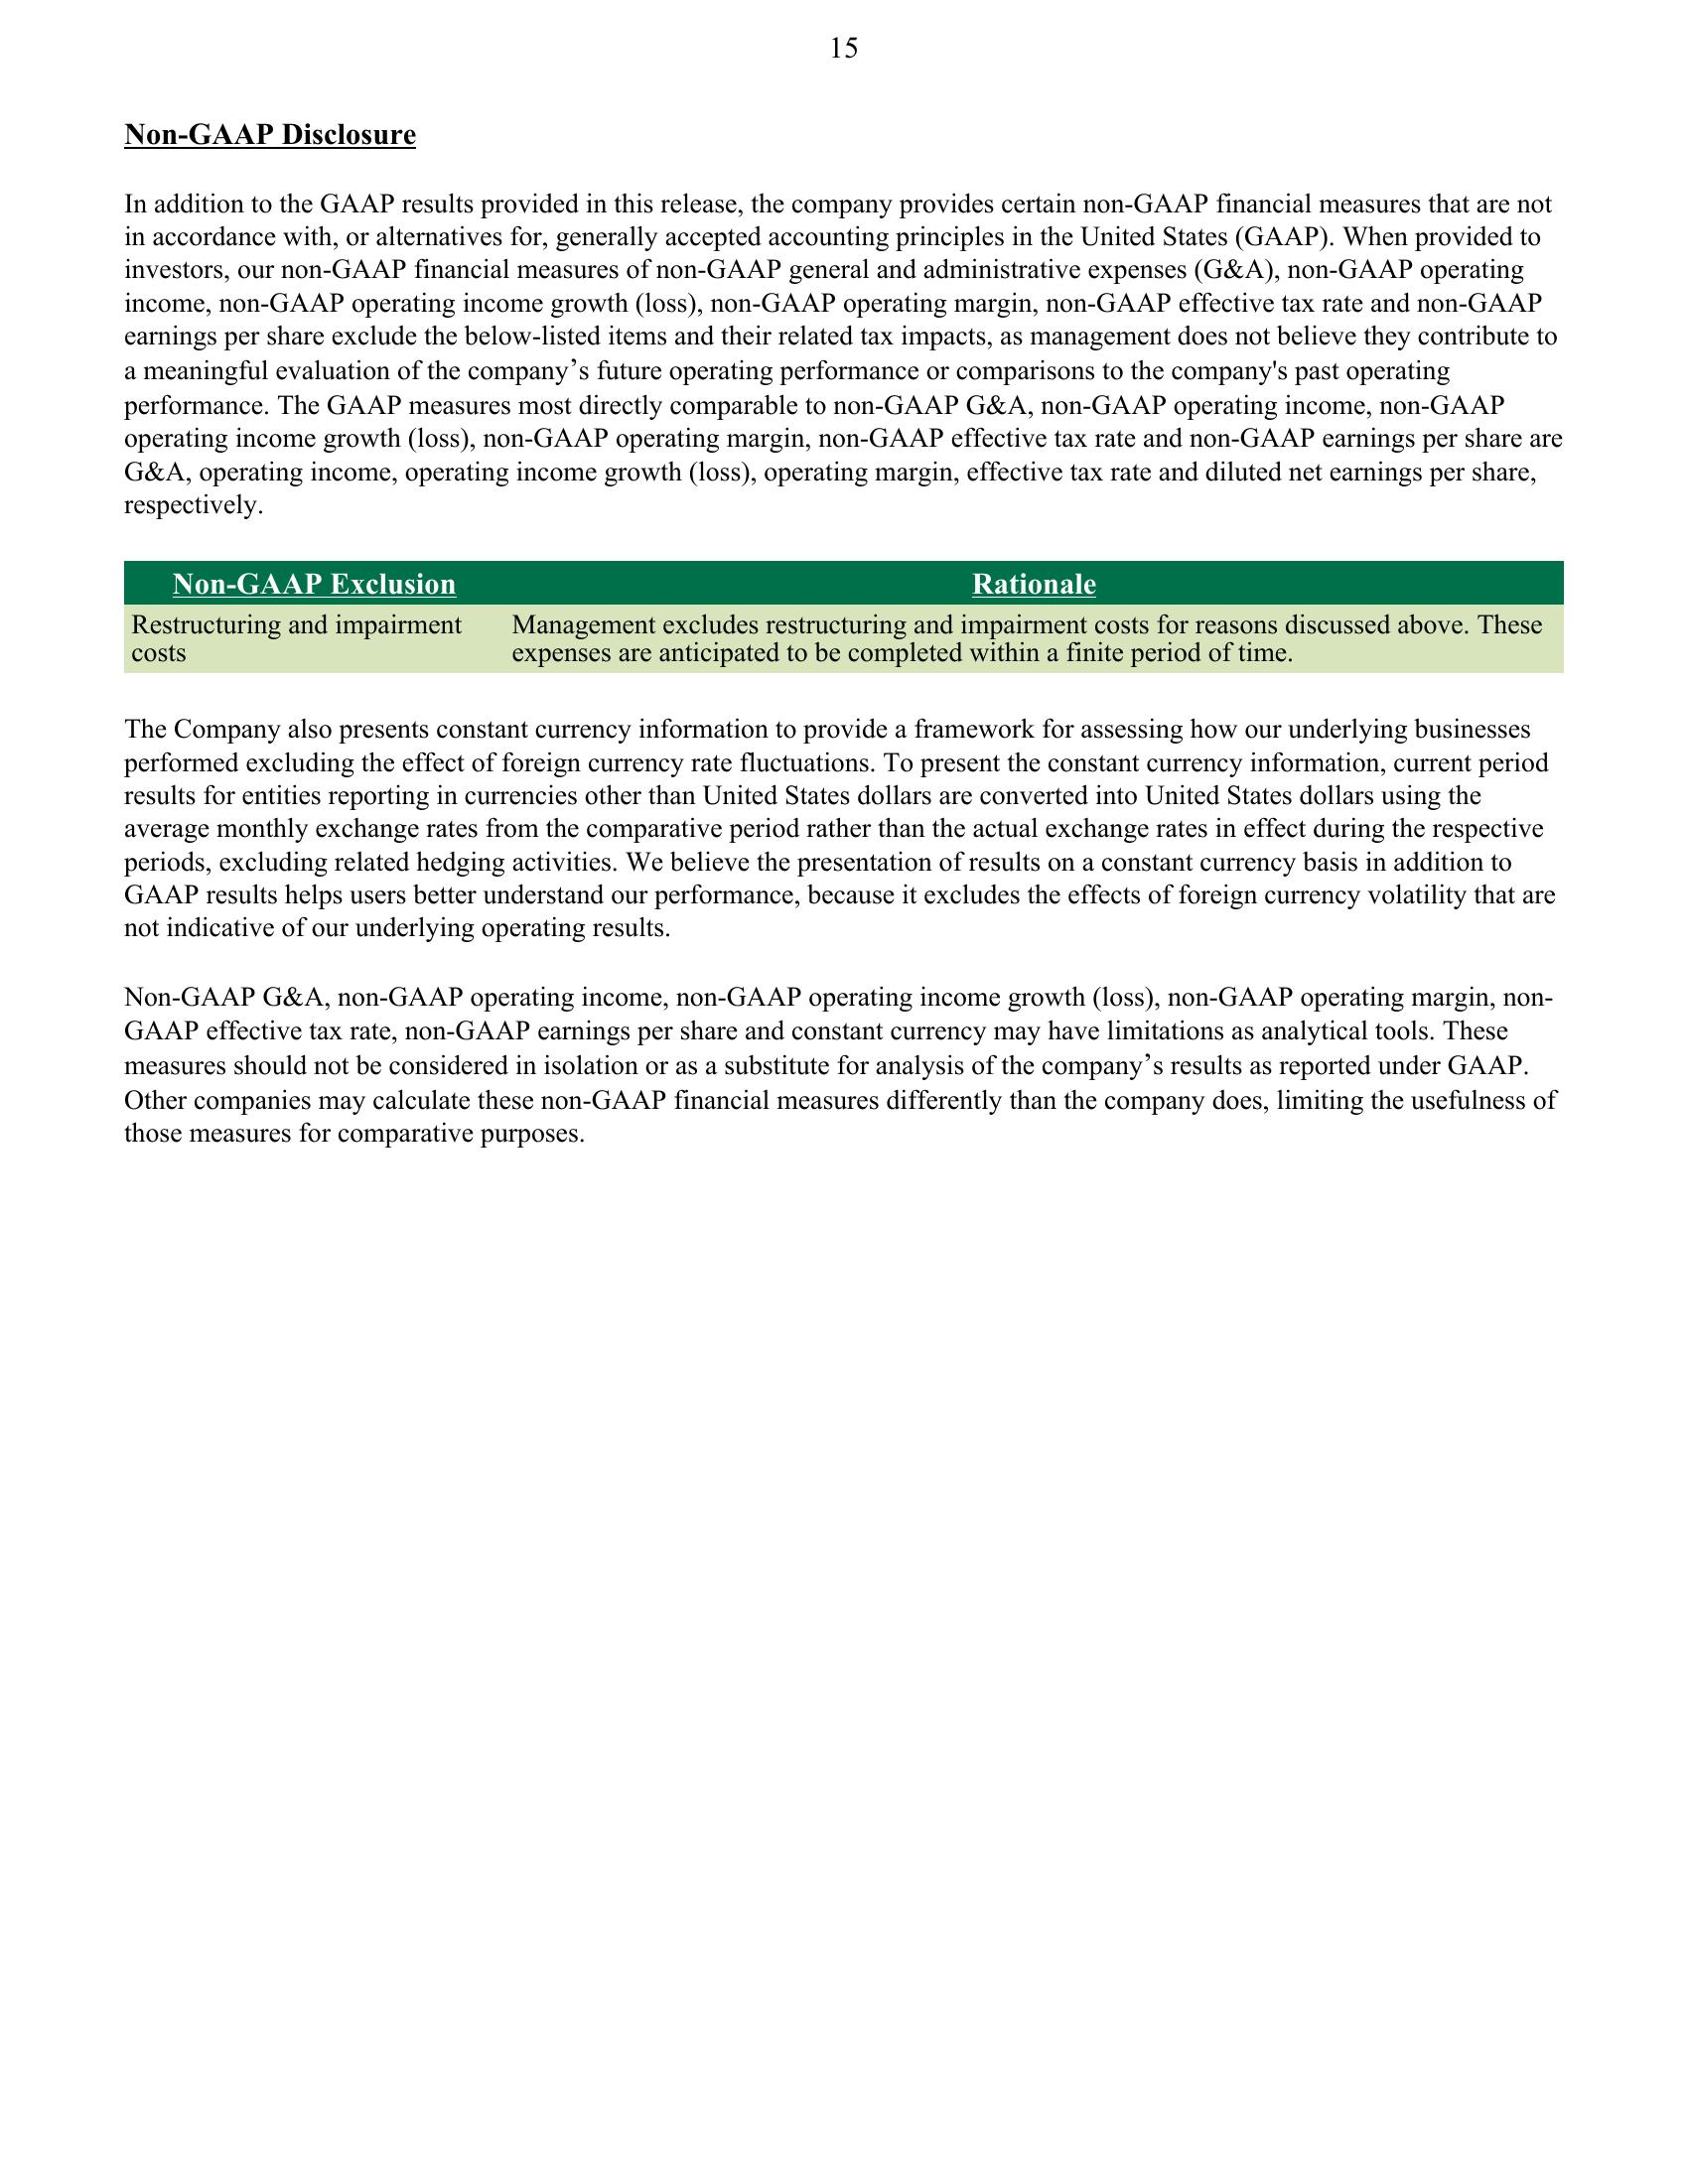
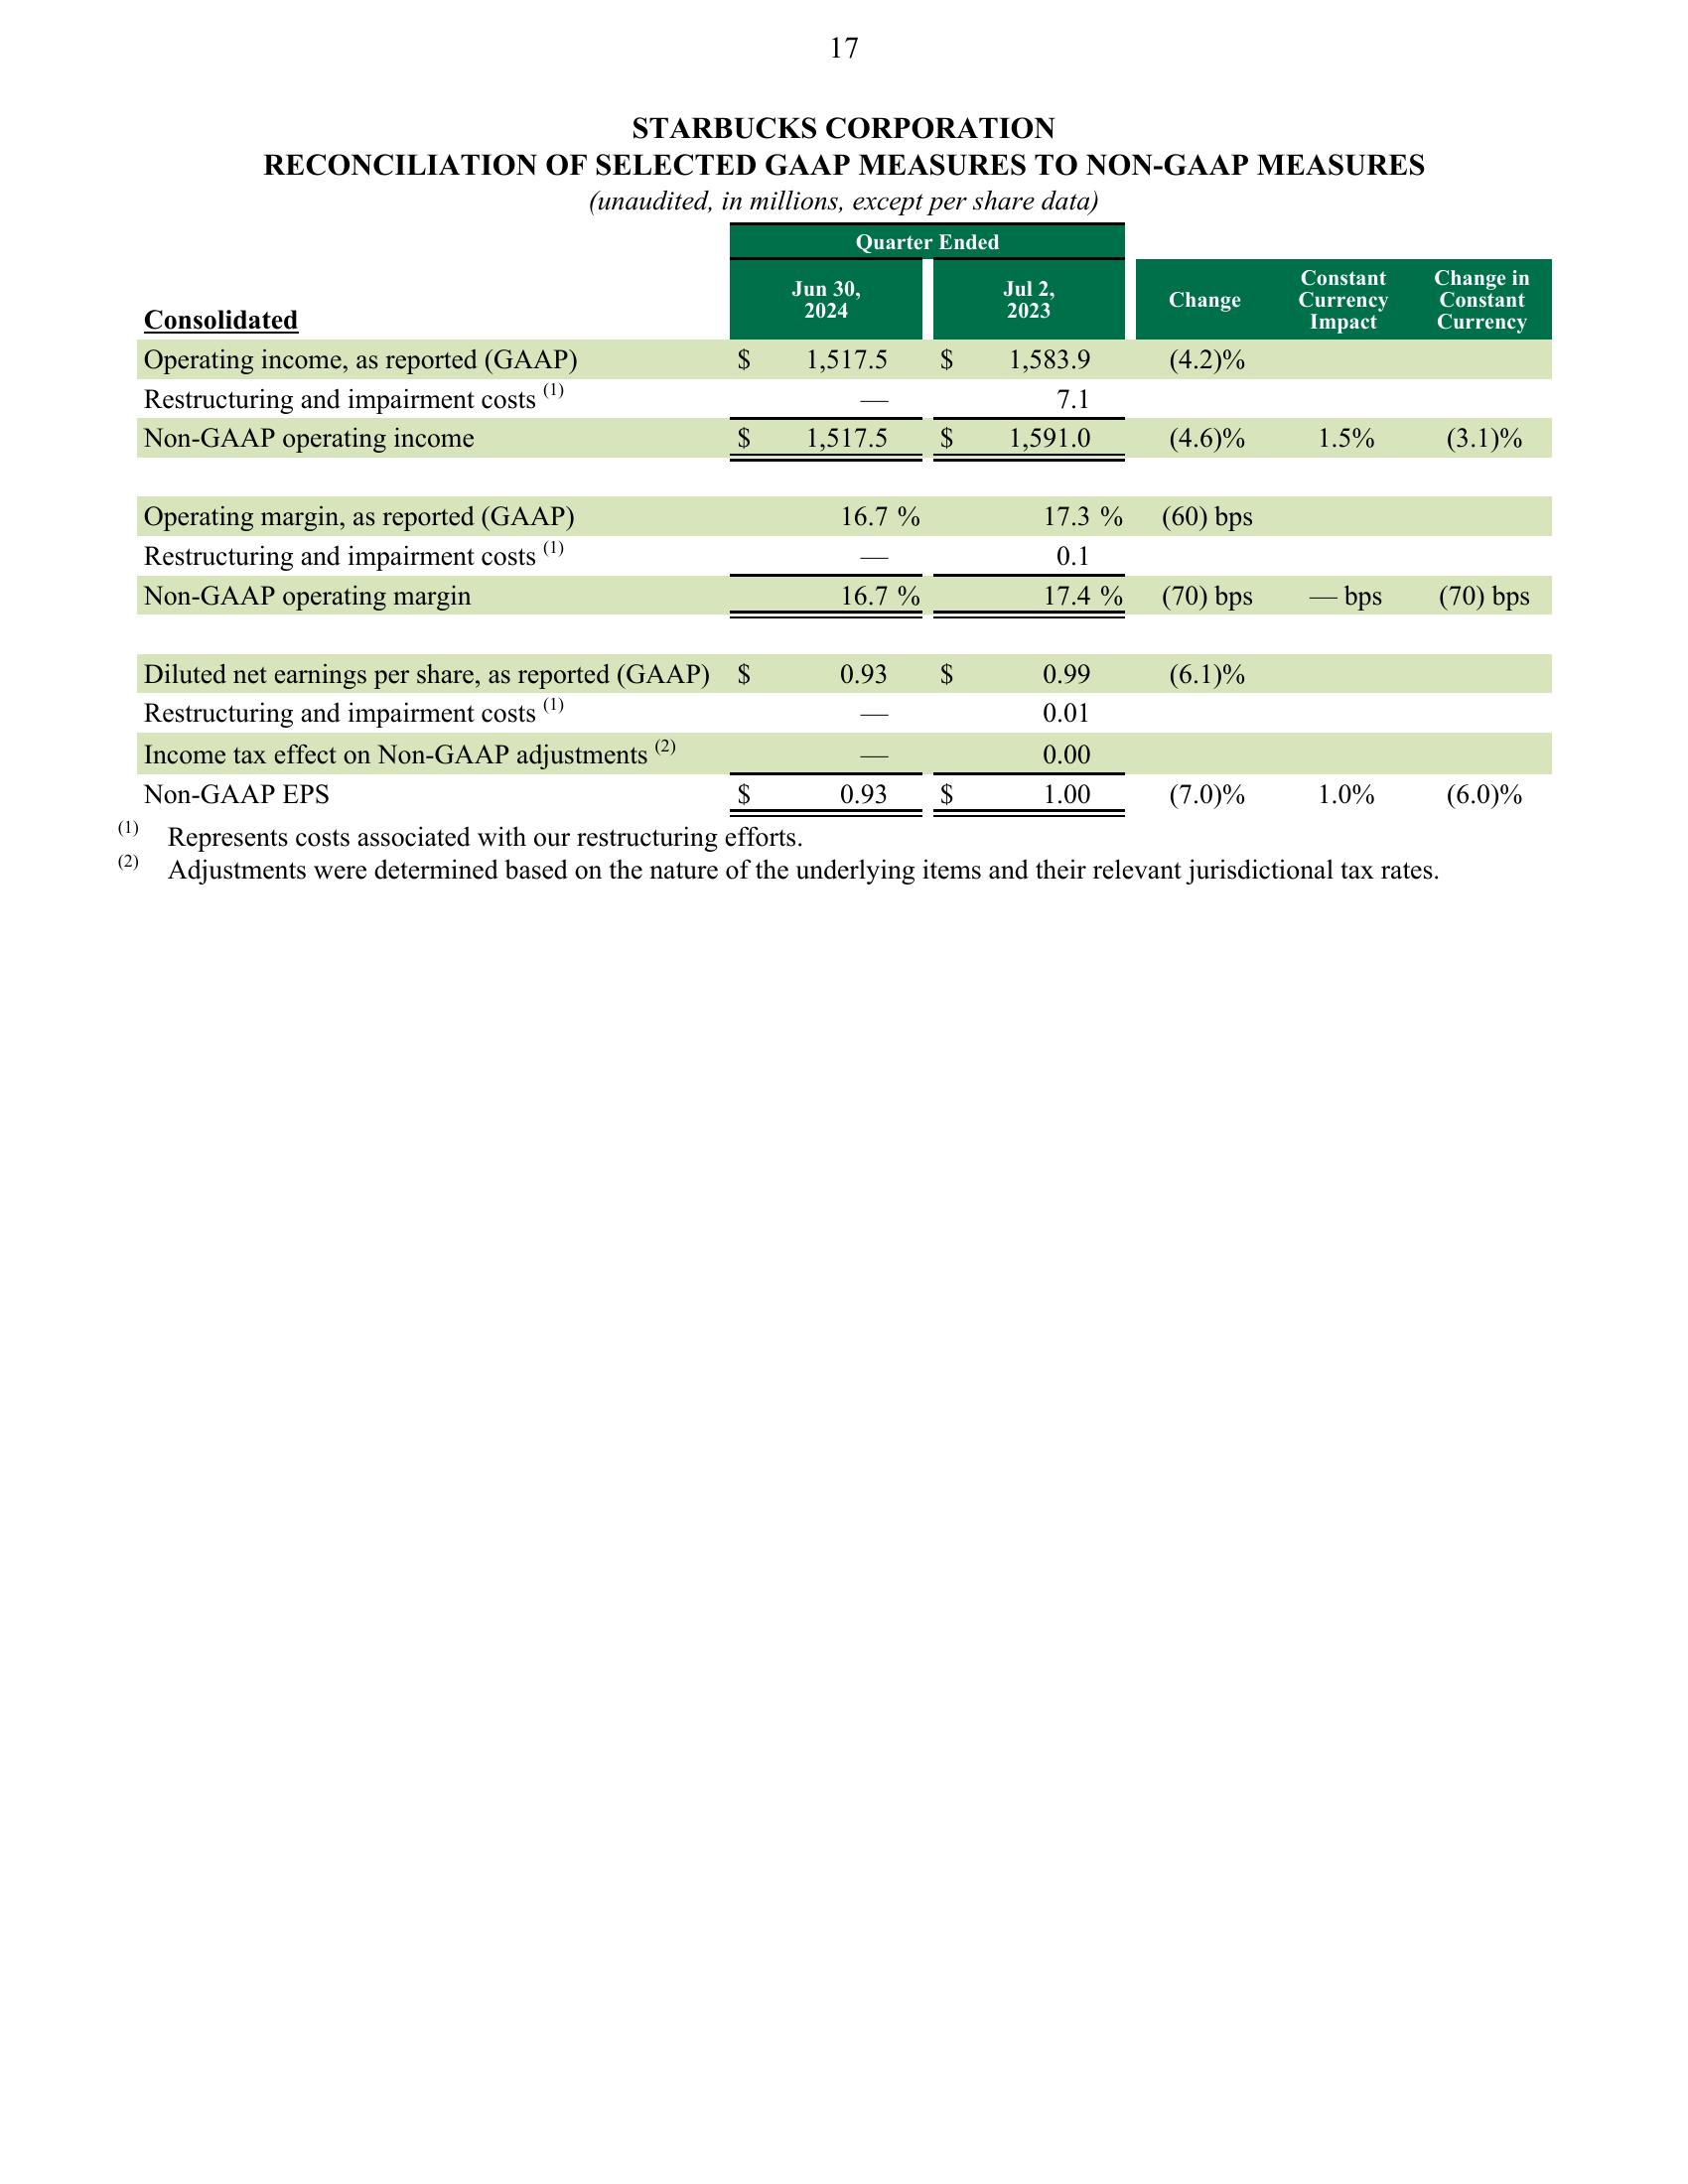
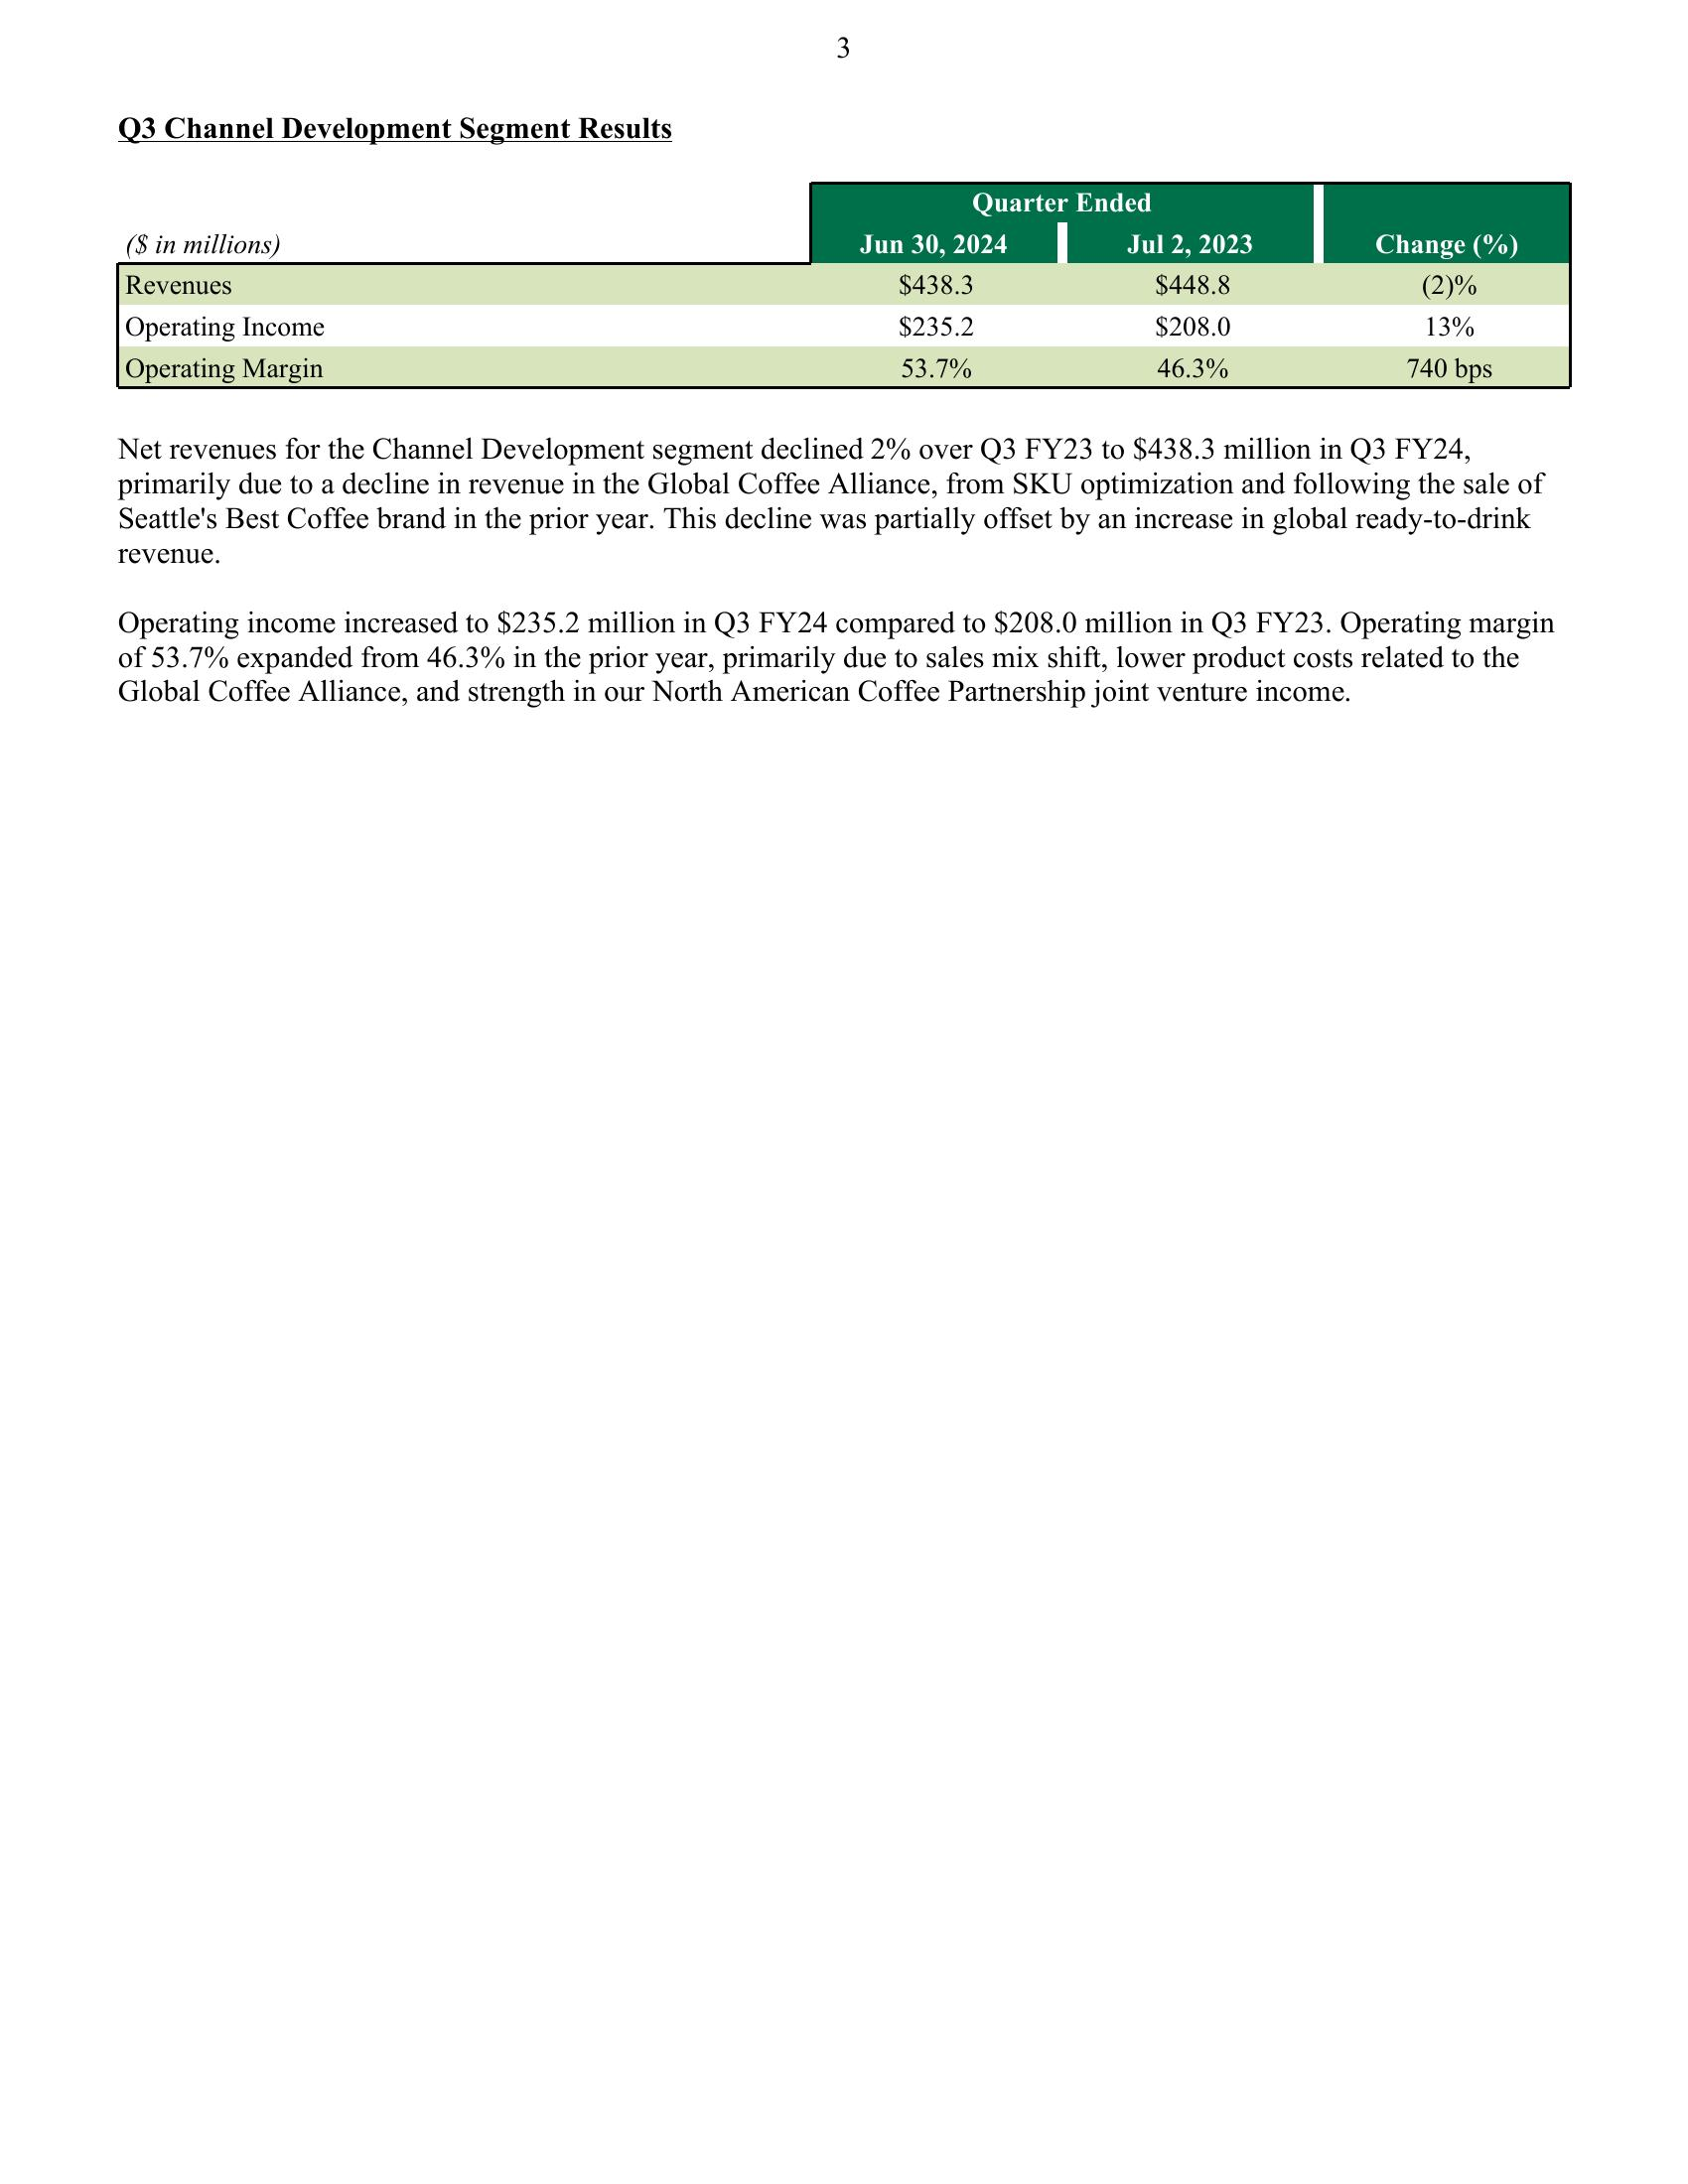
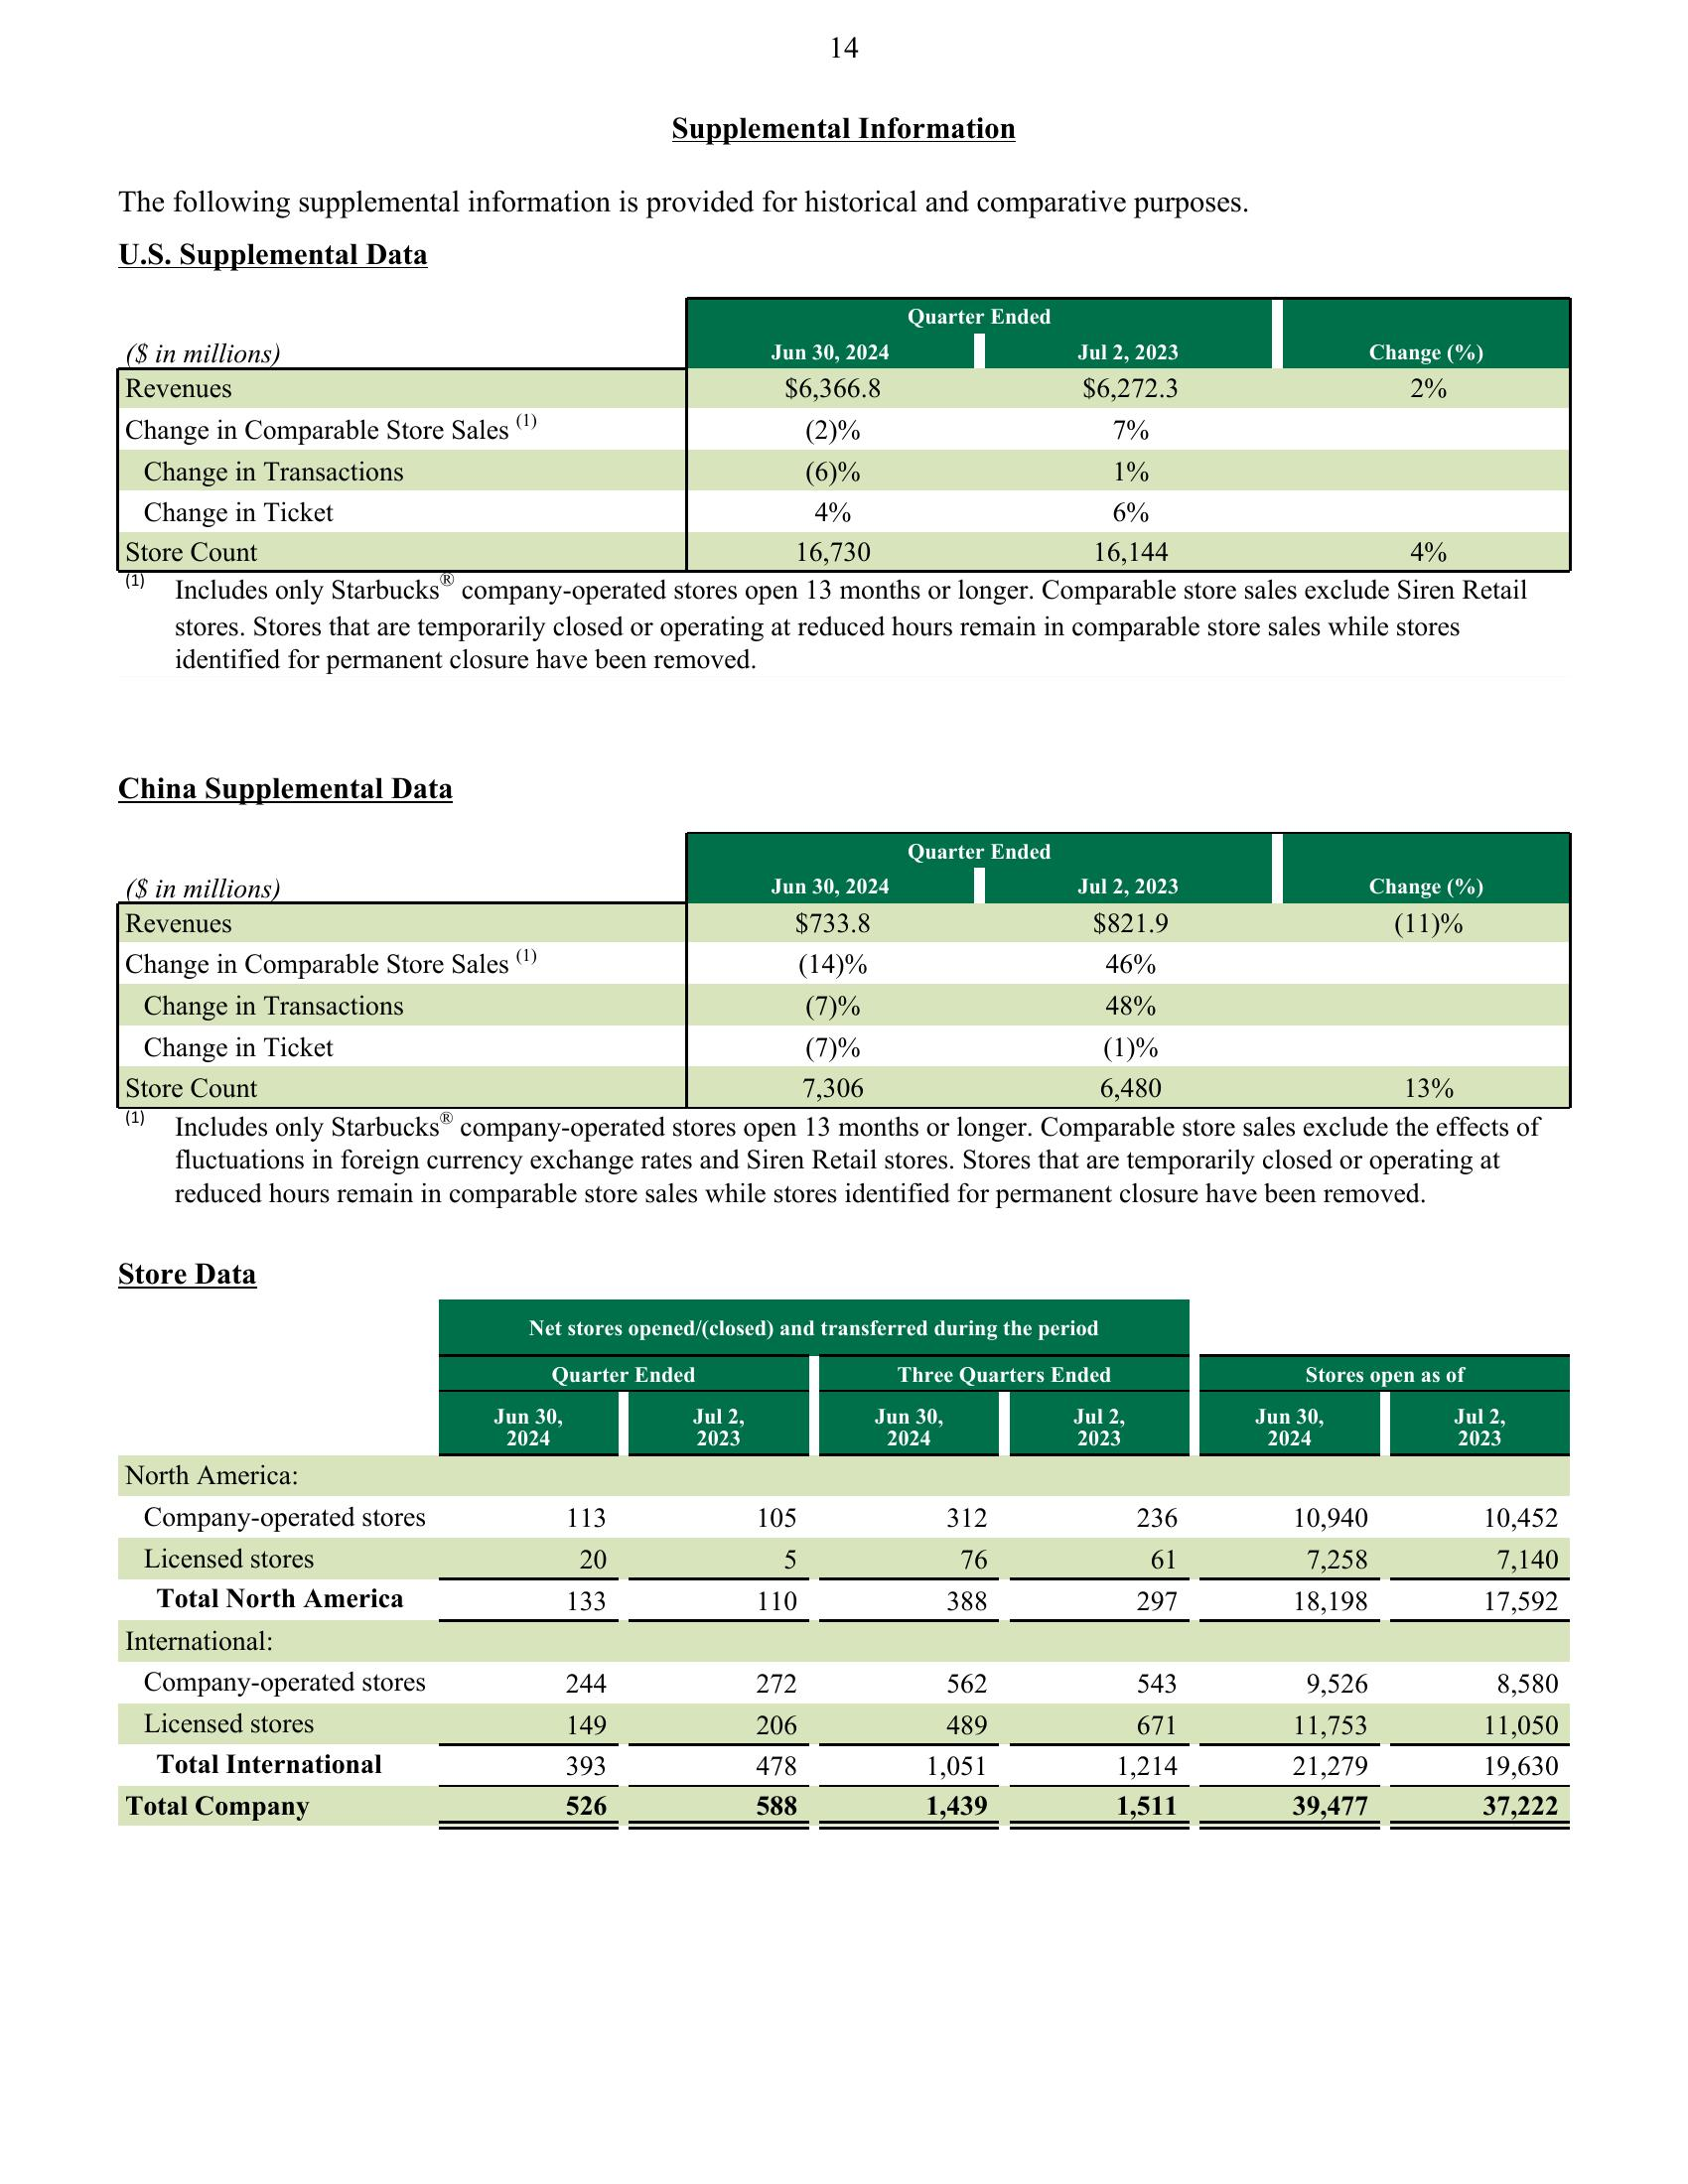
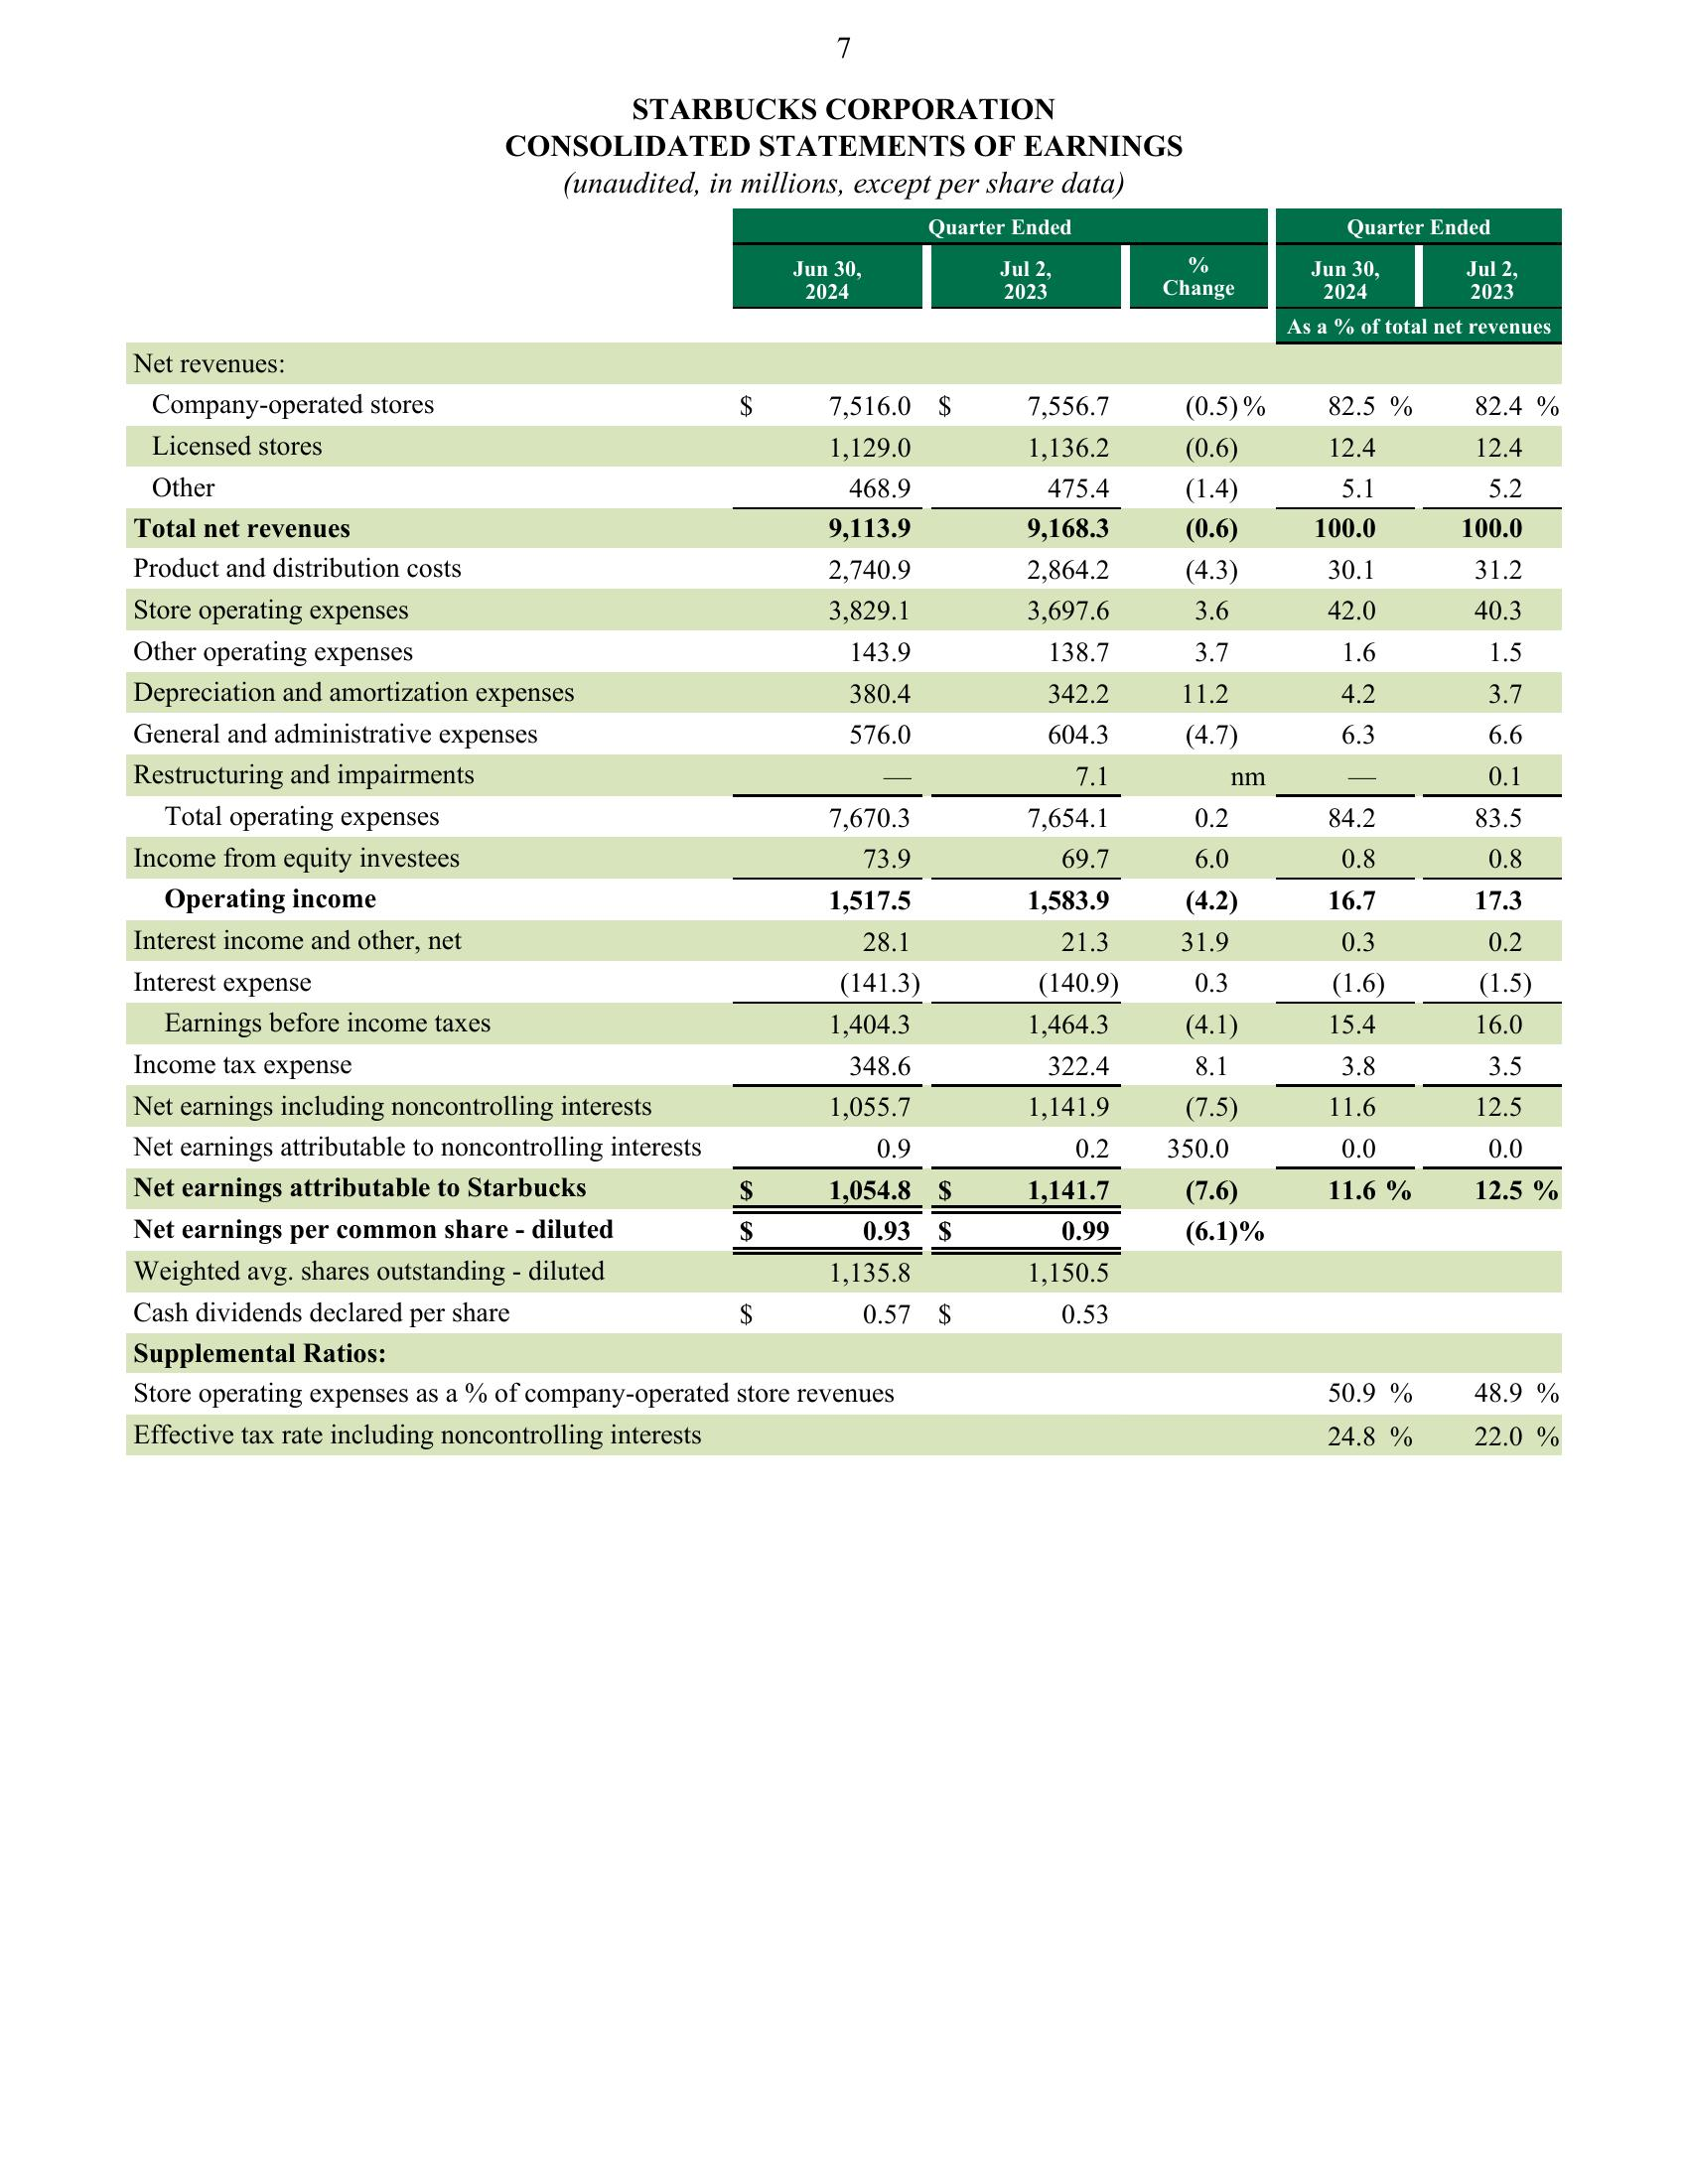

In [ ]:
# Prepare the list of images
image_data_list = [{'type': 'image_url',
                    'image_url': {'url': f'data:image/png;base64,{img}',
                                  'detail': 'high'}} for img in base64frame]
image_data_list

In [ ]:
# Prepare the message content
user_message_content = [
    {'type': 'text', 'text': text_context},
    *image_data_list
]

In [ ]:
# Generate the answer
response = client.chat.completions.create(
    model = 'gpt-4o-mini',
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user', 'content': user_message_content}],
    temperature = 0.2
)

In [ ]:
# Display generated answer
display(Markdown(response.choices[0].message.content))

Based on the provided information, here are the short-term risks for Starbucks Corporation:

1. **International Market Weakness**: The company is experiencing weakness in parts of its international business, particularly in the Middle East, Southeast Asia, and certain European markets. This is attributed to brand misperceptions and economic pressures on consumers in these regions.

2. **Challenges in China**: China represents a significant challenge for Starbucks, with competitive pressures impacting market share and profitability. This could hinder growth prospects in one of the largest coffee markets.

3. **Declining Comparable Store Sales**: In the U.S., comparable store sales have declined by 2%, indicating potential issues with customer retention and engagement. A decrease in transactions (down 6%) further exacerbates this concern.

4. **Currency Fluctuations**: The company faces risks related to foreign currency exchange rates, which can impact revenues and profitability, especially in international markets.

5. **Increased Operating Costs**: Rising product and distribution costs (up 4.3%) and store operating expenses may pressure margins. The company reported a decrease in operating income and margins, which could affect profitability.

6. **Restructuring Costs**: Ongoing restructuring and impairment costs may impact financial performance in the near term, as these expenses are anticipated to be completed within a finite time but still represent a burden on current earnings.

7. **Market Competition**: Increased competition in the coffee market could affect Starbucks' ability to maintain its market share and pricing power, particularly in regions where it is facing headwinds.

8. **Economic Conditions**: Economic pressures on consumers, particularly in Europe, could lead to reduced discretionary spending on premium coffee products, affecting overall sales.

These factors collectively pose risks that could impact Starbucks' short-term financial performance and market position.